# 🚩 Reviewer's Final Comment:
* Excellent Coding. Keep up the good work. I loved how model performances have been compared through visualization.
* Lack of preprocessing is evident. For example, the code didn't check for missing values.
* I would have liked the correlation matrix as a heatmap.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv('/content/laptop_prices.csv')

In [ ]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


##Q. [a]

In [ ]:
# 1. Top 5 laptop brands by the number of products listed
top_5_brands = df['Company'].value_counts().head(5)
print("Top 5 Laptop Brands by Number of Products:")
print(top_5_brands)

Top 5 Laptop Brands by Number of Products:
Company
Dell      291
Lenovo    289
HP        268
Asus      152
Acer      101
Name: count, dtype: int64


##Q. [b]

In [ ]:
# 2. Average price for each brand and identifying the highest and lowest
average_price_by_brand = df.groupby('Company')['Price_euros'].mean().sort_values()
lowest_avg_price_brand = average_price_by_brand.idxmin()
highest_avg_price_brand = average_price_by_brand.idxmax()
print("Average prices by brand:")
print(average_price_by_brand)
print(f"Highest average price: {highest_avg_price_brand}")
print(f"Lowest average price: {lowest_avg_price_brand}")

Average prices by brand:
Company
Vero          217.425000
Mediacom      295.000000
Chuwi         314.296667
Acer          633.464455
Fujitsu       729.000000
HP           1080.314664
Lenovo       1093.862215
Asus         1123.829737
Xiaomi       1133.462500
Dell         1199.225120
Toshiba      1267.812500
Samsung      1413.444444
Huawei       1424.000000
Apple        1564.198571
Microsoft    1612.308333
Google       1677.666667
MSI          1728.908148
LG           2099.000000
Razer        3346.142857
Name: Price_euros, dtype: float64
Highest average price: Razer
Lowest average price: Vero


##Q. [c]

In [ ]:
# 3. Correlation analysis for numeric features with Price
numeric_features = ['Price_euros', 'CPU_freq', 'Ram', 'Inches', 'Weight']
correlation_matrix = df[numeric_features].corr()
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
             Price_euros  CPU_freq       Ram    Inches    Weight
Price_euros     1.000000  0.428847  0.740287  0.070091  0.211883
CPU_freq        0.428847  1.000000  0.366254  0.303115  0.318649
Ram             0.740287  0.366254  1.000000  0.245009  0.389370
Inches          0.070091  0.303115  0.245009  1.000000  0.827339
Weight          0.211883  0.318649  0.389370  0.827339  1.000000


##Q. [d]

In [ ]:
# 4. Creating a new feature 'StorageTotal'
df['StorageTotal'] = df['PrimaryStorage'] + df['SecondaryStorage']

##Q. [e] Regression models

In [ ]:
# 5. Regression model to predict Price_euros
features = ['Ram', 'Inches', 'CPU_freq', 'StorageTotal']
target = 'Price_euros'

In [ ]:
df['Ram'] = df['Ram'].fillna(df['Ram'].median())
df['Inches'] = df['Inches'].fillna(df['Inches'].median())
df['CPU_freq'] = df['CPU_freq'].fillna(df['CPU_freq'].median())
df['StorageTotal'] = df['StorageTotal'].fillna(df['StorageTotal'].median())

In [ ]:
# Splitting data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Training the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Making predictions and evaluating the regression model
y_test_pred = linear_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_test_pred)
r2 =r2_score(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2_test_Score(Linear Regression): {r2}")
y_train_pred = linear_reg.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f"R2_train_Score(Linear Regression): {r2}")

Mean Squared Error: 173566.01053850458
R2_test_Score(Linear Regression): 0.6503077242502462
R2_train_Score(Linear Regression): 0.593426598904035


In [ ]:
#Using PolynomialRegression model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [ ]:
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
y_test_pred = poly_reg.predict(X_test_poly)
mse = mean_squared_error(y_test, y_test_pred)
r2 =r2_score(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2_test_Score(Polynomial Regression): {r2}")
y_train_pred = poly_reg.predict(X_train_poly)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f"R2_train_Score(Polynomial Regression): {r2}")

Mean Squared Error: 169580.15851839446
R2_test_Score(Polynomial Regression): 0.6583382231906182
R2_train_Score(Polynomial Regression): 0.6239692609105635


In [ ]:
# Using RandomForestRegression model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
y_test_pred = rf_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2_test_Score(RandomForestRegression): {r2}")
y_train_pred = rf_reg.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
print(f"R2_train_Score(RandomForestRegression): {r2}")
#It is the best model in this case

Mean Squared Error: 109439.95635033208
R2_test_Score(RandomForestRegression): 0.779505749568339
R2_train_Score(RandomForestRegression): 0.8582245876185592


###Visualizing the R2 scores and Mean squared error for these models

In [ ]:
results = {
    'Linear Regression': {
        'R² Train': r2_score(y_train, linear_reg.predict(X_train_scaled)),
        'R² Test': r2_score(y_test, linear_reg.predict(X_test_scaled)),
        'MSE Train': mean_squared_error(y_train, linear_reg.predict(X_train_scaled)),
        'MSE Test': mean_squared_error(y_test, linear_reg.predict(X_test_scaled))
    },
    'Polynomial Regression': {
        'R² Train': r2_score(y_train, poly_reg.predict(X_train_poly)),
        'R² Test': r2_score(y_test, poly_reg.predict(X_test_poly)),
        'MSE Train': mean_squared_error(y_train, poly_reg.predict(X_train_poly)),
        'MSE Test': mean_squared_error(y_test, poly_reg.predict(X_test_poly))
    },
    'Random Forest Regression': {
        'R² Train': r2_score(y_train, rf_reg.predict(X_train_scaled)),
        'R² Test': r2_score(y_test, rf_reg.predict(X_test_scaled)),
        'MSE Train': mean_squared_error(y_train, rf_reg.predict(X_train_scaled)),
        'MSE Test': mean_squared_error(y_test, rf_reg.predict(X_test_scaled))
    }
}

df_results = pd.DataFrame(results).T


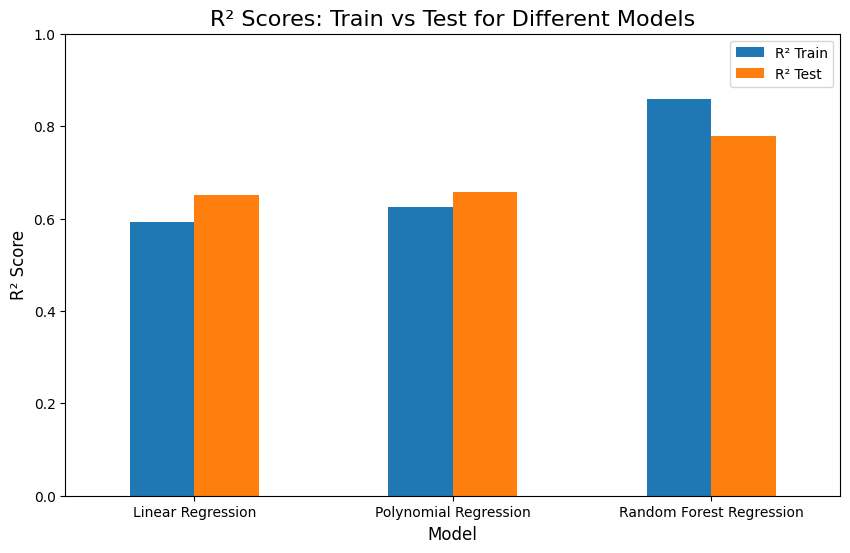

In [ ]:
# Creating bar plot for R² scores (Train and Test)
df_r2_scores = df_results[['R² Train', 'R² Test']]
df_r2_scores.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Adding title and labels
plt.title('R² Scores: Train vs Test for Different Models', fontsize=16)
plt.ylabel('R² Score', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Showing the plot
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Assuming R² scores are between 0 and 1
plt.legend(['R² Train', 'R² Test'], loc='upper right')
plt.show()


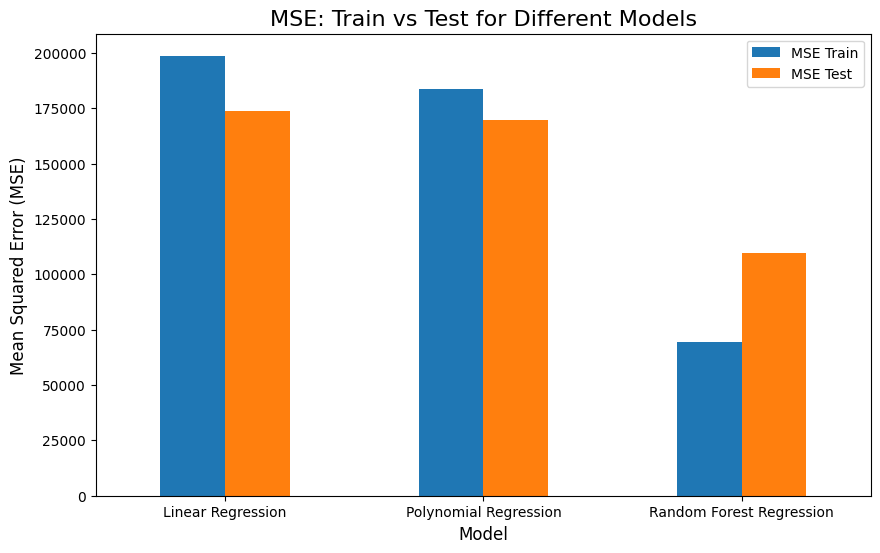

In [ ]:
# Creating bar plot for Mean Squared Error (MSE)
df_mse_scores = df_results[['MSE Train', 'MSE Test']]  # Select MSE scores
df_mse_scores.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Adding title and labels
plt.title('MSE: Train vs Test for Different Models', fontsize=16)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Showing the plot
plt.xticks(rotation=0)
plt.legend(['MSE Train', 'MSE Test'], loc='upper right')
plt.show()


###From the above results of the three models, we can say that RandomForestRegressor is the best regression model for this problem

##Q. [f] Classification Models

In [ ]:
# Classification model to predict laptop TypeName
classification_features = ['Inches', 'Ram', 'StorageTotal', 'Weight']
classification_target = 'TypeName'

In [ ]:
# Handling missing values in classification features
df['Weight'].fillna(df['Weight'].median(), inplace=True)

<ipython-input-59-866f7495723c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna(df['Weight'].median(), inplace=True)


In [ ]:
# Dropping rows with missing values
df_cleaned = df.dropna()

In [ ]:
# Defining features and target for classification
X_class = df_cleaned[classification_features]
y_class = df_cleaned[classification_target]

In [ ]:
# Splitting data into training and testing sets for classification
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

In [ ]:
scaler= StandardScaler()
X_class_train_scaled = scaler.fit_transform(X_class_train)
X_class_test_scaled = scaler.transform(X_class_test)

In [ ]:
# Training Random Forest Classifier
rf_classifier = RandomForestClassifier(min_samples_leaf=5)
rf_classifier.fit(X_class_train_scaled, y_class_train)

RandomForestClassifier(min_samples_leaf=5)

In [ ]:
y_train_pred_rf = rf_classifier.predict(X_class_train_scaled)
y_test_pred_rf = rf_classifier.predict(X_class_test_scaled)

train_accuracy_rf = accuracy_score(y_class_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_class_test, y_test_pred_rf)

print("Training score:", train_accuracy_rf)
print("Testing score:", test_accuracy_rf)  # It works best in this case

Training score: 0.8351851851851851
Testing score: 0.7573529411764706


In [ ]:
# Training Desision Tree Classifier
dt_classifier = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
dt_classifier.fit(X_class_train_scaled, y_class_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [ ]:
y_train_pred_dt = dt_classifier.predict(X_class_train_scaled)
y_test_pred_dt = dt_classifier.predict(X_class_test_scaled)

train_accuracy_dt = accuracy_score(y_class_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_class_test, y_test_pred_dt)

print("Training score:", train_accuracy_dt)
print("Testing score:", test_accuracy_dt)


Training score: 0.7240740740740741
Testing score: 0.6838235294117647


In [ ]:
#Using Adaboost classifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_class_train_scaled, y_class_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [ ]:
y_train_pred_ada = ada_classifier.predict(X_class_train_scaled)
y_test_pred_ada = ada_classifier.predict(X_class_test_scaled)

train_accuracy_ada = accuracy_score(y_class_train, y_train_pred_ada)
test_accuracy_ada = accuracy_score(y_class_test, y_test_pred_ada)

print("Training score:", train_accuracy_ada)
print("Testing score:", test_accuracy_ada)

Training score: 0.6444444444444445
Testing score: 0.6397058823529411


###Visualizing the accuracy scores, precision, F1 and recall for these classification models

In [ ]:
results = {
    'AdaBoost Classifier': {
        'train_score': train_accuracy_ada,
        'test_score': test_accuracy_ada
    },
    'Random Forest Classifier': {
        'train_score': train_accuracy_rf,
        'test_score': test_accuracy_rf
    },
    'Decision Tree Classifier': {
        'train_score': train_accuracy_dt,
        'test_score': test_accuracy_dt
    }
}


df_results = pd.DataFrame(results)
df_results = df_results.T


<Figure size 1000x600 with 0 Axes>

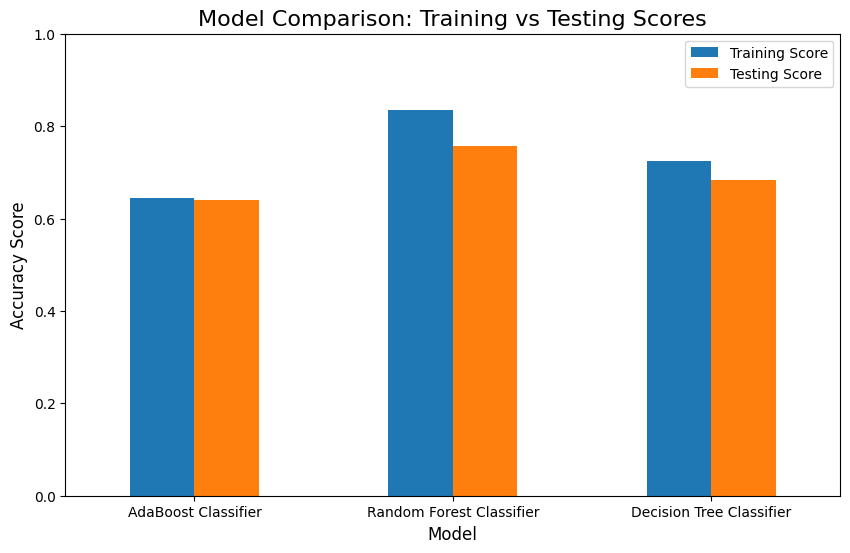

In [ ]:
# Creating a bar plot for training and testing scores
plt.figure(figsize=(10, 6))
df_results.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Adding title and labels
plt.title('Model Comparison: Training vs Testing Scores', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Showing the plot
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Assuming accuracy scores are between 0 and 1
plt.legend(['Training Score', 'Testing Score'])
plt.show()


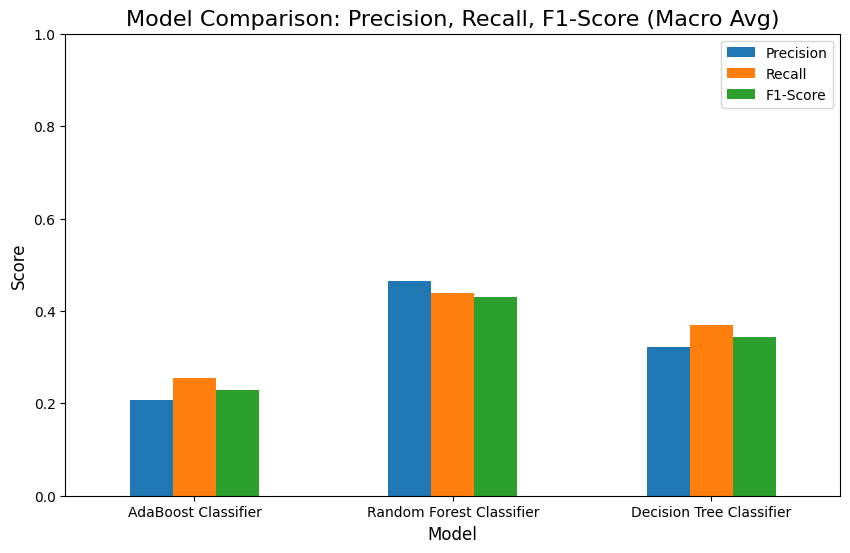

In [ ]:
report_ada = classification_report(y_class_test, y_test_pred_ada, output_dict=True,zero_division=0)
report_rf = classification_report(y_class_test, y_test_pred_rf, output_dict=True,zero_division=0)
report_dt = classification_report(y_class_test, y_test_pred_dt, output_dict=True,zero_division=0)


df_report_ada = pd.DataFrame(report_ada).transpose()
df_report_rf = pd.DataFrame(report_rf).transpose()
df_report_svm = pd.DataFrame(report_dt).transpose()

metrics = pd.DataFrame({
    'AdaBoost Classifier': df_report_ada.loc['macro avg', ['precision', 'recall', 'f1-score']],
    'Random Forest Classifier': df_report_rf.loc['macro avg', ['precision', 'recall', 'f1-score']],
    'Decision Tree Classifier': df_report_svm.loc['macro avg', ['precision', 'recall', 'f1-score']],
})

metrics = metrics.T

# Creating a bar plot for precision, recall, and f1-score comparison
metrics.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Model Comparison: Precision, Recall, F1-Score (Macro Avg)', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)

# Showing the plot
plt.xticks(rotation=0)
plt.ylim(0, 1)  # Assuming scores are between 0 and 1
plt.legend(['Precision', 'Recall', 'F1-Score'], loc='upper right')
plt.show()

From analyzing these results, we can say that RandomForestClassifier works best in this case